
Build a decision tree classifier to classify iris flower species.


**Expected Output:**


Load the Iris dataset.
Train a decision tree classifier.
Print the classification report and confusion matrix.
Visualize the decision tree.


In [1]:
#downloading the data
!wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

--2024-06-24 03:14:27--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-06-24 03:14:28 (47.9 MB/s) - ‘iris.csv’ saved [3858/3858]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [7]:
data = pd.read_csv('iris.csv')
print(data.head(5)) #first 5 entries
print(np.shape(data))


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


In [8]:
#splitting the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


DecisionTreeClassifier()

In [9]:
#prediction

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


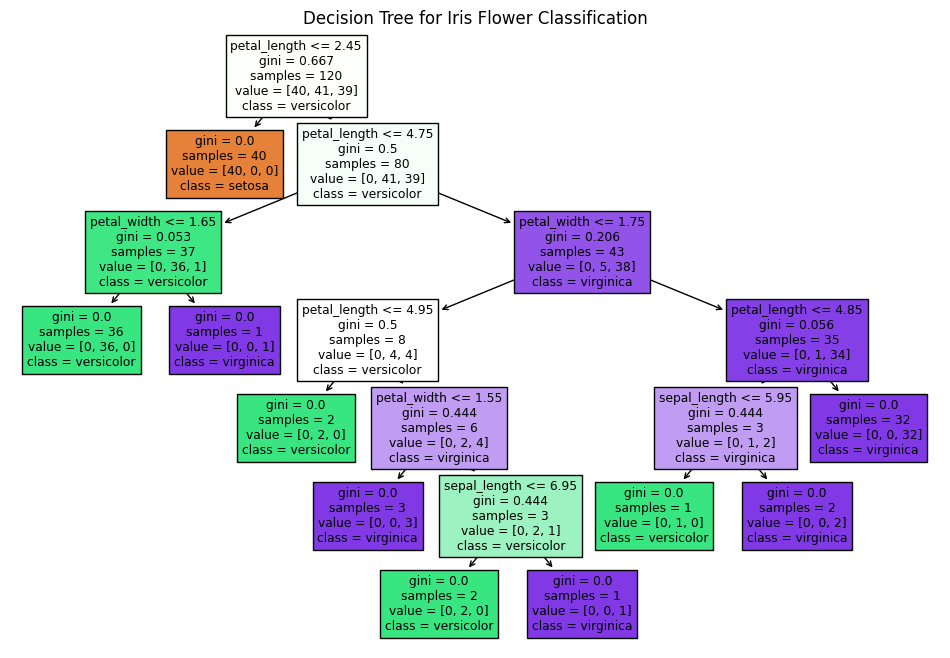

In [10]:
#visualtization

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=data.columns[:-1], class_names=data['species'].unique(), filled=True)
plt.title("Decision Tree for Iris Flower Classification")
plt.show()